In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from utils.funcs import transform_x, contingency_table_analysis
from utils.new_or_used import build_dataset
warnings.filterwarnings('ignore')
%matplotlib inline


In [9]:
X_train_org, y_train_org, X_test_org, y_test_org = build_dataset()

In [17]:
# La variable objetivo toma el valor de 1 si es nuevo y 0 si es usado
y_train = [1 if x == 'new' else 0 for x in y_train_org]
y_test = [1 if x == 'new' else 0 for x in y_test_org]

# Crear dataframe X_train and X_test
X_train_df = pd.DataFrame(X_train_org)
X_test_df = pd.DataFrame(X_test_org)

# Limpiar y transformar dataframes
X_train_df = transform_x(X_train_df)
X_test_df = transform_x(X_test_df)

# Se incluye la variable objetivo en X_train para data analysis
X_train_df["target"] = y_train

X_train_df.head(5)

,warranty,sub_status,condition,seller_id,listing_type_id,price,buying_mode,category_id,last_updated,pictures,...,number_variations,has_attributes,number_attributes,has_warranty,sold_quantity_category,available_quantity_category,time_diff,days_active,days_active_category,target
0,Nada,none,new,8208882349,bronze,80.0,buy_it_now,MLA126406,2015-09-05T20:42:58.000Z,"[{'size': '500x375', 'secure_url': 'https://a2...",...,0,0,0,1,0,0,5.18400,0,0. 0,1
1,NUESTRA REPUTACION,none,used,8141699488,silver,2650.0,buy_it_now,MLA10267,2015-09-26T18:08:34.000Z,"[{'size': '499x334', 'secure_url': 'https://a2...",...,0,0,0,1,0,0,5.18400,0,0. 0,0
2,Nada,none,used,8386096505,bronze,60.0,buy_it_now,MLA1227,2015-09-09T23:57:10.000Z,"[{'size': '375x500', 'secure_url': 'https://a2...",...,0,0,0,1,0,0,5.18400,0,0. 0,0
3,Nada,none,new,5377752182,silver,580.0,buy_it_now,MLA86345,2015-10-05T16:03:50.306Z,"[{'size': '441x423', 'secure_url': 'https://a2...",...,0,0,0,1,0,0,5.72552,6,1. 1-7,1
4,MI REPUTACION.,none,used,2938071313,bronze,30.0,buy_it_now,MLA41287,2015-08-28T13:37:41.000Z,"[{'size': '375x500', 'secure_url': 'https://a2...",...,0,0,0,1,0,0,5.18400,3,1. 1-7,0


In [12]:
X_train_df.columns

Index(['warranty', 'sub_status', 'condition', 'seller_id', 'listing_type_id',
       'price', 'buying_mode', 'category_id', 'last_updated', 'pictures', 'id',
       'accepts_mercadopago', 'currency_id', 'title', 'automatic_relist',
       'date_created', 'stop_time', 'status', 'initial_quantity', 'start_time',
       'sold_quantity', 'available_quantity', 'seller_country', 'seller_state',
       'seller_city', 'shipping_local_pick_up', 'shipping_tags',
       'shipping_free_shipping', 'shipping_mode',
       'nmp_payment_contra_reembolso', 'nmp_payment_mercadopago',
       'nmp_payment_cheque_certificado', 'nmp_payment_visa_electron',
       'nmp_payment_american_express', 'nmp_payment_acordar_con_el_comprador',
       'nmp_payment_transferencia_bancaria', 'nmp_payment_efectivo',
       'nmp_payment_diners', 'nmp_payment_tarjeta_de_crédito',
       'nmp_payment_mastercard_maestro', 'nmp_payment_mastercard',
       'nmp_payment_giro_postal', 'nmp_payment_visa',
       'tag_poor_quality_

### Revisar desbalance en clases

In [13]:
np.mean(y_train)

0.5372444444444444

Las clases estan balanceadas, dado que el promedio entre las clases usado y nuevo esta cercano al 0.5.

### Revisar missing values
Se eliminaron las variables con mas de 90% de missing values

In [16]:
missing_values = X_train_df.isnull().sum()
perc_missing_values = np.round(100 * (missing_values / len(X_train_df)), 1)
mv_df = pd.concat([missing_values, perc_missing_values, X_train_df.dtypes], axis=1)
mv_df.columns = ["Missing Values", "% Missing Values", "Type"]
mv_df = mv_df[mv_df["% Missing Values"] > 0]
mv_df.sort_values(by=["% Missing Values"], ascending=False)

,Missing Values,% Missing Values,Type
differential_pricing,90000,100.0,object
catalog_product_id,89993,100.0,float64
subtitle,90000,100.0,object
original_price,89870,99.9,float64
official_store_id,89255,99.2,float64
video_id,87324,97.0,object
warranty,54757,60.8,object
parent_item_id,20690,23.0,object


## Analisis por variables

#### sellers_address

1. Solo hay informacion para Argentina, por lo que la feature country no tiene variabilidad que ayude a seperar las clases
2. Las variables `state` y `city` si presentan variabilidad.

In [18]:
print(f"Numero de paises: {len(X_train_df['seller_country'].unique())}")
X_train_df["seller_country"].unique()

Numero de paises: 2


array(['Argentina', ''], dtype=object)

In [19]:
print(f"Numero de estados: {len(X_train_df['seller_state'].unique())}")
X_train_df["seller_state"].unique()

Numero de estados: 25


array(['Capital Federal', 'Buenos Aires', 'Santa Fe', 'Tucumán',
       'Mendoza', 'Córdoba', 'La Pampa', 'Chubut', 'Entre Ríos', 'Jujuy',
       'Santiago del Estero', 'Corrientes', 'Salta', 'Formosa', 'Chaco',
       'Santa Cruz', 'Río Negro', 'Misiones', 'San Juan', 'Neuquén',
       'La Rioja', 'San Luis', 'Catamarca', 'Tierra del Fuego', ''],
      dtype=object)

In [20]:
print(f"Numero de ciudades: {len(X_train_df['seller_city'].unique())}")
X_train_df["seller_city"].unique()

Numero de ciudades: 3480


array(['San Cristóbal', 'Buenos Aires', 'Boedo', ...,
       'Remedios De Escalada', 'bella vista (san miguel)', 'Almafuerte'],
      dtype=object)

Chi2: 355.37
p-value: 0.0000
La variable categórica `seller_state` separa bien las clases del target.


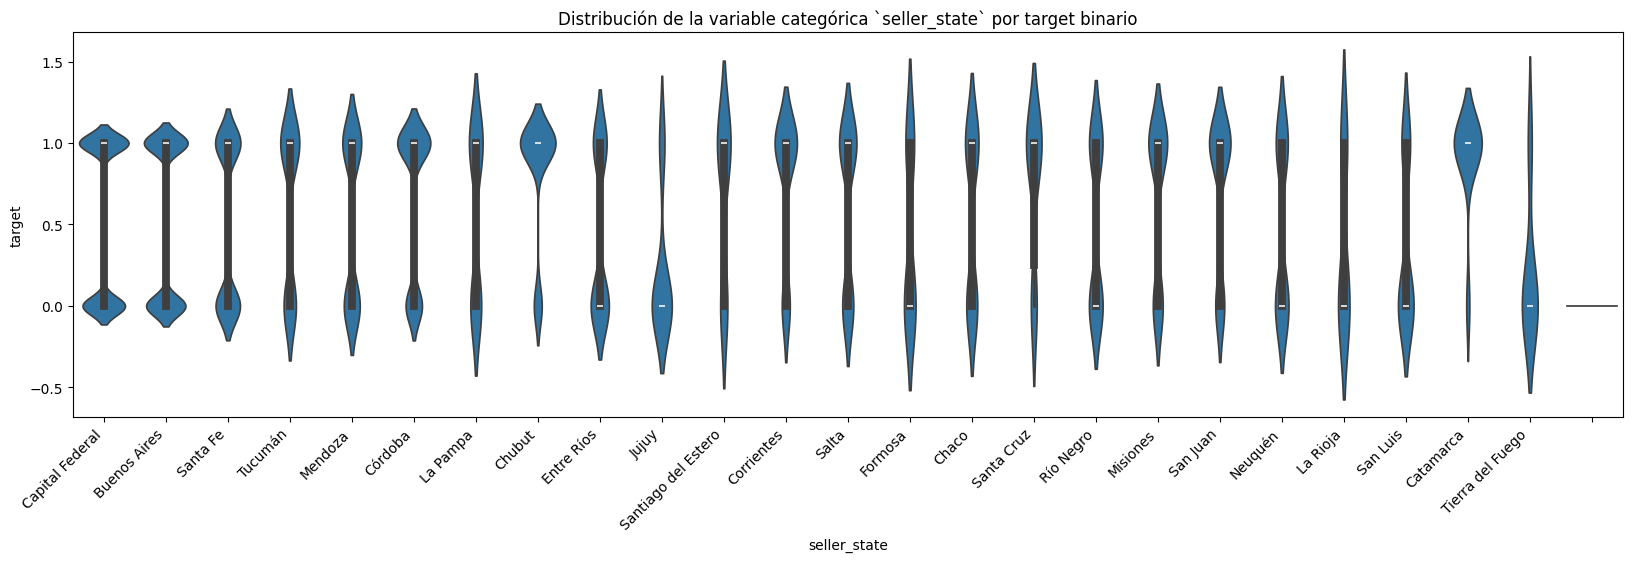

In [21]:
_ = contingency_table_analysis(X_train_df, "seller_state", plot_it=True, figsize=(20,5))

In [22]:
_ = contingency_table_analysis(X_train_df, "seller_city", plot_it=False)

Chi2: 15798.24
p-value: 0.0000
La variable categórica `seller_city` separa bien las clases del target.


#### sub_status

In [24]:
X_train_df["sub_status"].unique()

array(['none', 'suspended', 'expired', 'deleted'], dtype=object)

Chi2: 2.45
p-value: 0.4841
La variable categórica `sub_status` no separa bien las clases del target.


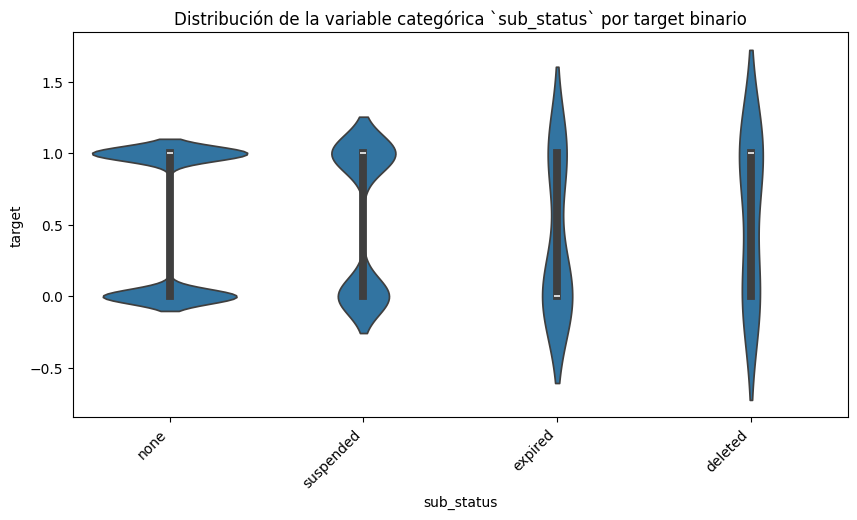

In [25]:
_ = contingency_table_analysis(X_train_df, "sub_status", plot_it=True, figsize=(10,5))

#### listing_type_id

In [26]:
X_train_df['listing_type_id'].unique()

array(['bronze', 'silver', 'free', 'gold_special', 'gold', 'gold_premium',
       'gold_pro'], dtype=object)

Chi2: 23643.38
p-value: 0.0000
La variable categórica `listing_type_id` separa bien las clases del target.


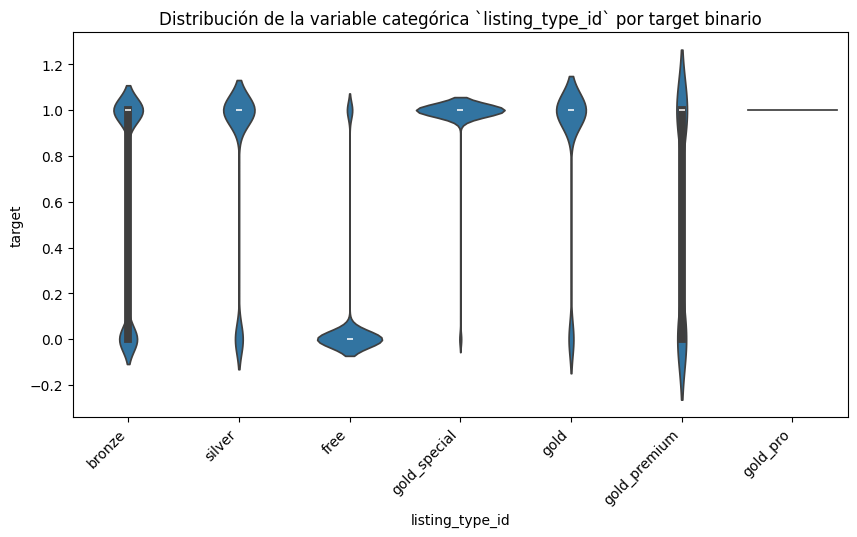

In [27]:
_ = contingency_table_analysis(X_train_df, "listing_type_id", plot_it=True, figsize=(10,5))

#### Buying Mode

In [28]:
X_train_df['buying_mode'].unique()

array(['buy_it_now', 'classified', 'auction'], dtype=object)

Chi2: 912.58
p-value: 0.0000
La variable categórica `buying_mode` separa bien las clases del target.


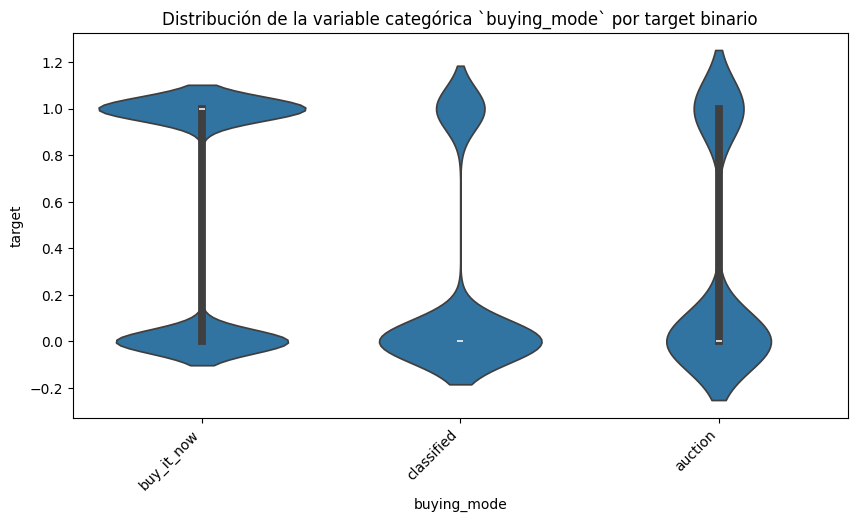

In [29]:
_ = contingency_table_analysis(X_train_df, "buying_mode", plot_it=True, figsize=(10,5))

#### accepts_mercadopago

Chi2: 770.43
p-value: 0.0000
La variable categórica `accepts_mercadopago` separa bien las clases del target.


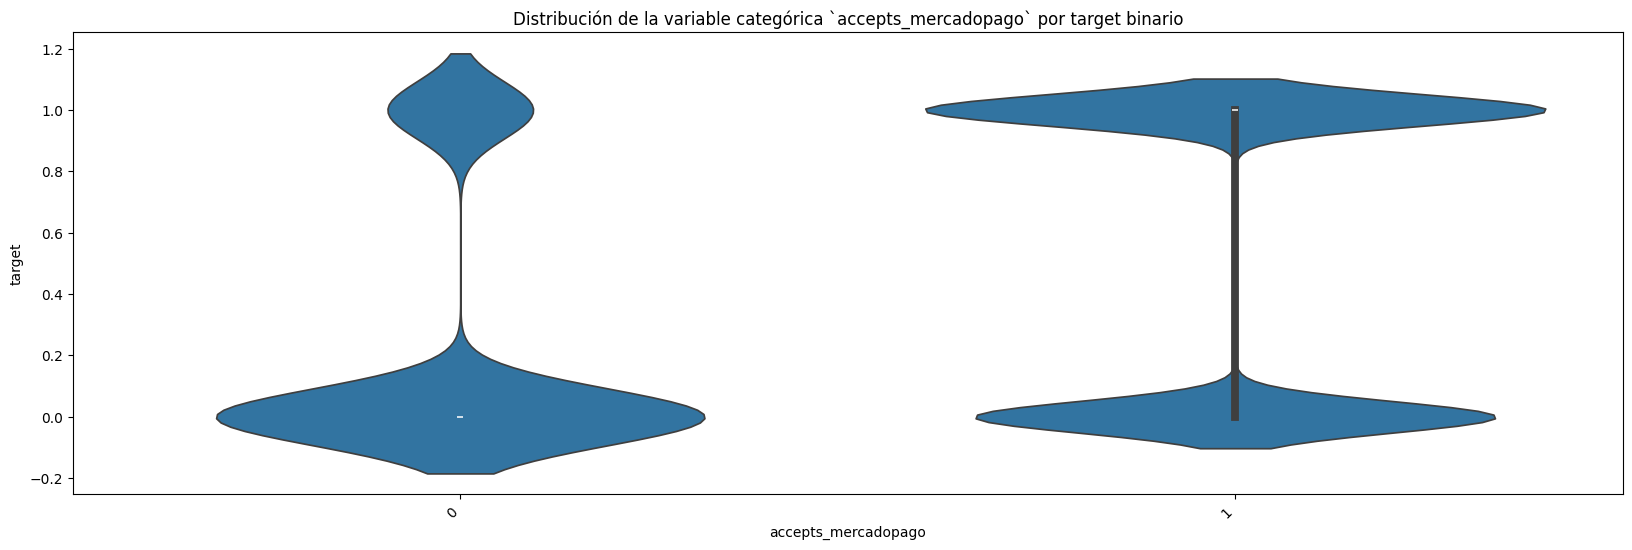

In [30]:
_ = contingency_table_analysis(X_train_df, "accepts_mercadopago", figsize=(20,6))

#### currency_id

In [31]:
X_train_df["currency_id"].groupby(X_train_df["currency_id"]).count().sort_values(ascending=False).head(2)

currency_id
ARS    89496
USD      504
Name: currency_id, dtype: int64

Chi2: 55.65
p-value: 0.0000
La variable categórica `currency_id` separa bien las clases del target.


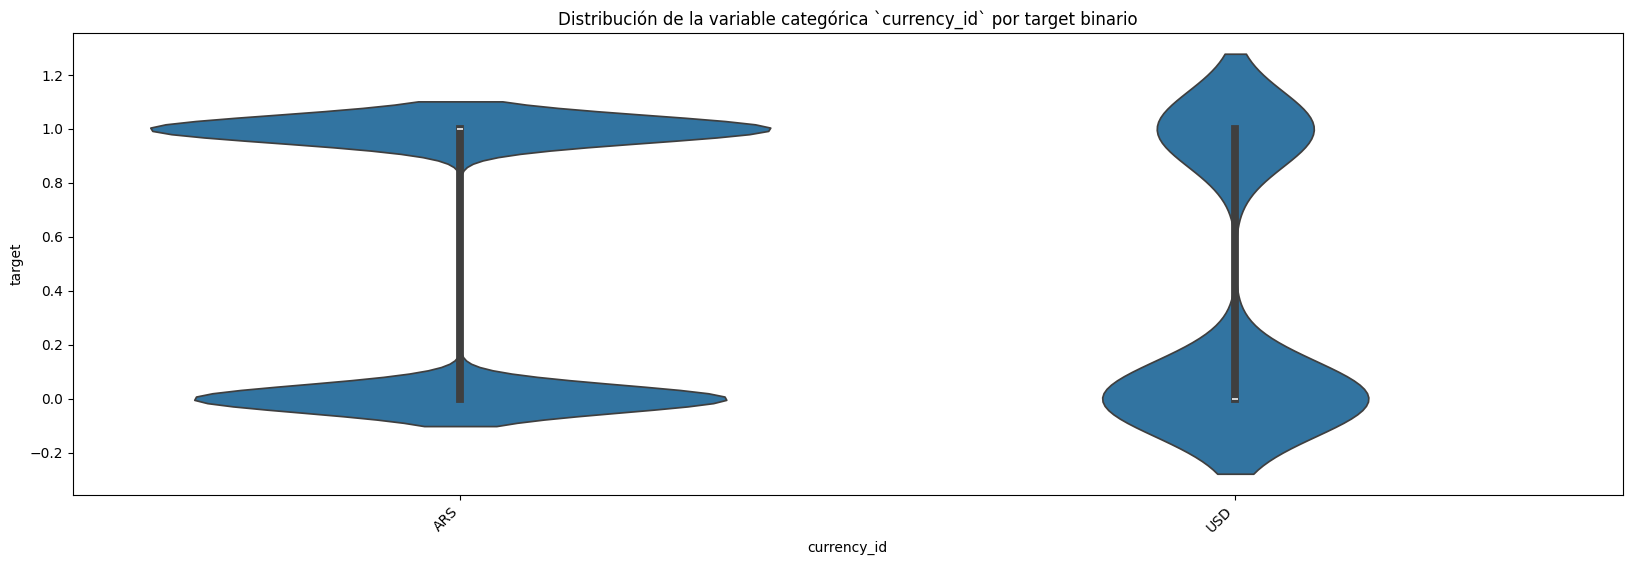

In [32]:
_ = contingency_table_analysis(X_train_df, "currency_id", figsize=(20,6))

#### automatic_relist

In [33]:
X_train_df["automatic_relist"].groupby(X_train_df["automatic_relist"]).count()

automatic_relist
0    85773
1     4227
Name: automatic_relist, dtype: int64

Chi2: 3119.52
p-value: 0.0000
La variable categórica `automatic_relist` separa bien las clases del target.


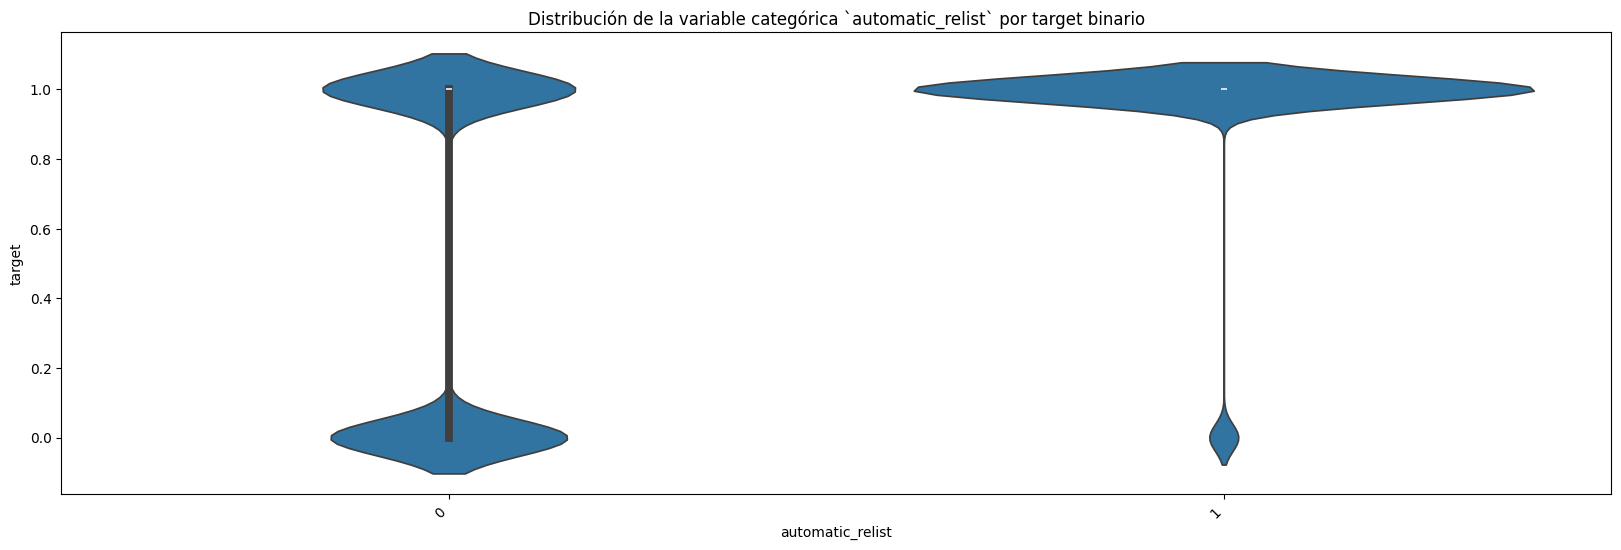

In [34]:
_ = contingency_table_analysis(X_train_df, "automatic_relist", figsize=(20,6))

#### status

In [35]:
X_train_df["status"].groupby(X_train_df["status"]).count().sort_values(ascending=False)

status
active            86116
paused             3863
closed               20
not_yet_active        1
Name: status, dtype: int64

Chi2: 336.07
p-value: 0.0000
La variable categórica `status` separa bien las clases del target.


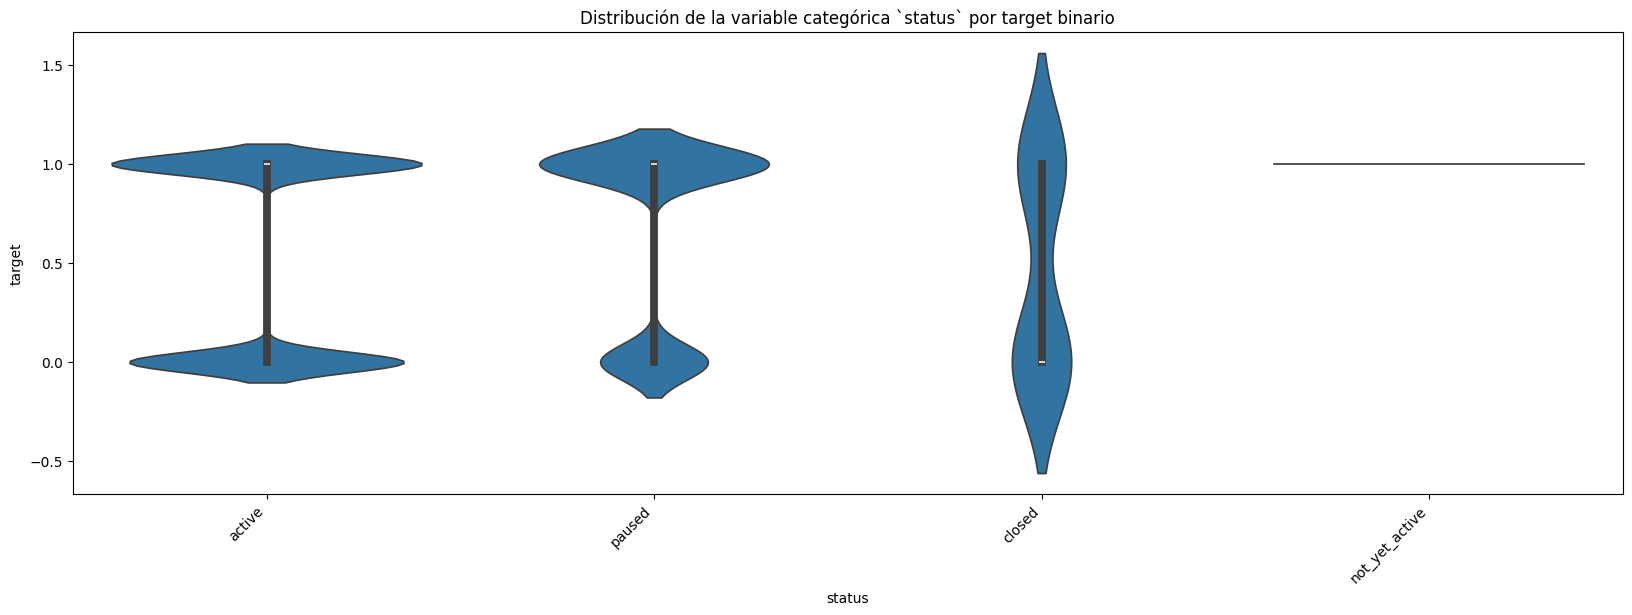

In [36]:
_ = contingency_table_analysis(X_train_df, "status", figsize=(20, 6))

#### sold_quantity

In [37]:
X_train_df["sold_quantity_category"].groupby(X_train_df["sold_quantity_category"]).count()

sold_quantity_category
0    74834
1    15166
Name: sold_quantity_category, dtype: int64

Chi2: 9097.82
p-value: 0.0000
La variable categórica `sold_quantity_category` separa bien las clases del target.


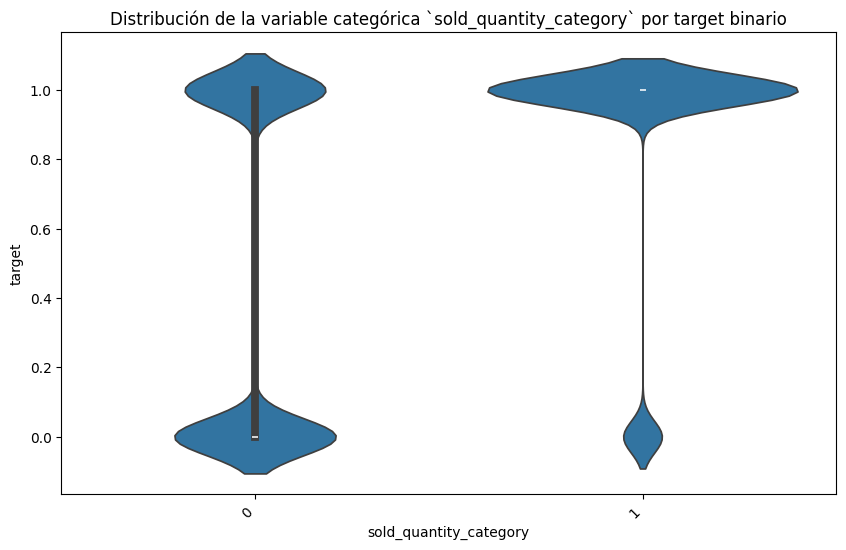

In [38]:
_ = contingency_table_analysis(X_train_df, "sold_quantity_category", figsize=(10,6))

#### available_quantity

In [39]:
X_train_df["available_quantity_category"].groupby(X_train_df["available_quantity_category"]).count()

available_quantity_category
0    63732
1    26268
Name: available_quantity_category, dtype: int64

Chi2: 25367.90
p-value: 0.0000
La variable categórica `available_quantity_category` separa bien las clases del target.


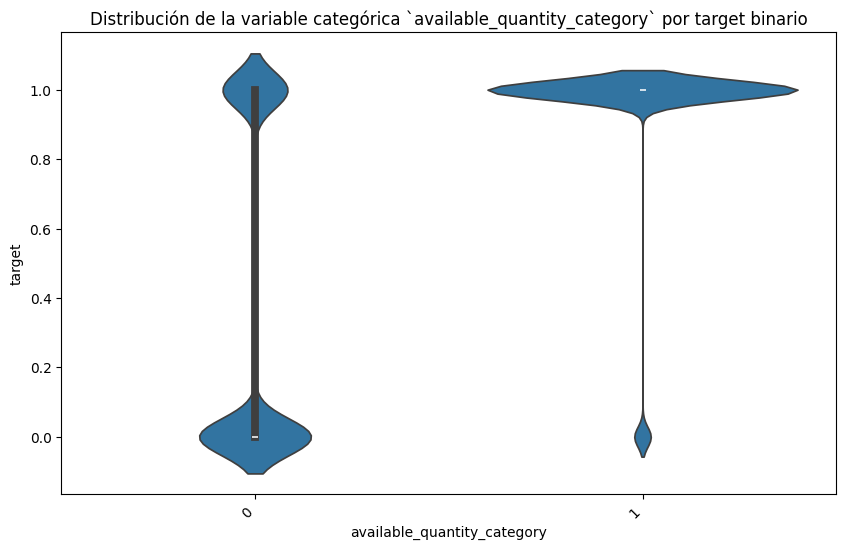

In [40]:
_ = contingency_table_analysis(X_train_df, "available_quantity_category", figsize=(10,6))

#### Tiempo activo?
Mide el tiempo entre la creación del item y la ultima actualización. No esoy seguro si es el tiempo activo pero se probará si ayuda a separar. 

In [41]:
X_train_df["days_active_category"].groupby(X_train_df["days_active_category"]).count()

days_active_category
-1               17
0. 0          62649
1. 1-7         6564
2. 8-15        5745
3. 16-30       7539
4. 31-more     7486
Name: days_active_category, dtype: int64

Chi2: 2237.12
p-value: 0.0000
La variable categórica `days_active_category` separa bien las clases del target.


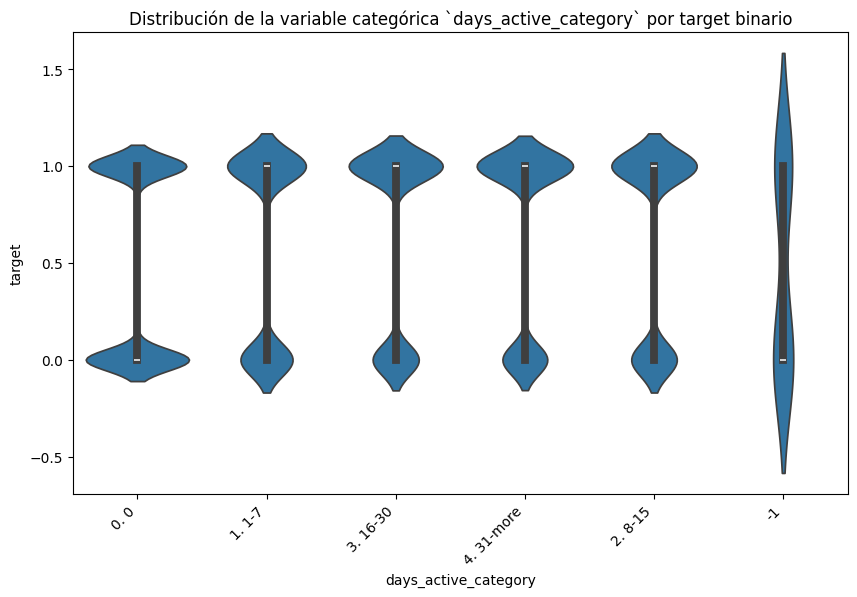

In [42]:
_ = contingency_table_analysis(X_train_df, "days_active_category", figsize=(10,6))

#### shipping_local_pick_up

Chi2: 158.21
p-value: 0.0000
La variable categórica `shipping_local_pick_up` separa bien las clases del target.


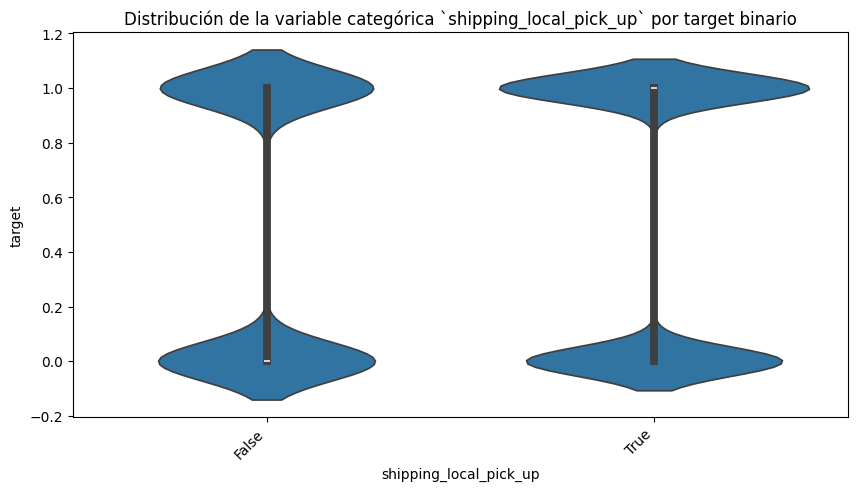

In [43]:
_ = contingency_table_analysis(X_train_df, "shipping_local_pick_up", plot_it=True, figsize=(10,5))

#### shipping_free_shipping

In [44]:
X_train_df['shipping_free_shipping'].groupby(X_train_df['shipping_free_shipping']).count()

shipping_free_shipping
False    87303
True      2697
Name: shipping_free_shipping, dtype: int64

Chi2: 1700.08
p-value: 0.0000
La variable categórica `shipping_free_shipping` separa bien las clases del target.


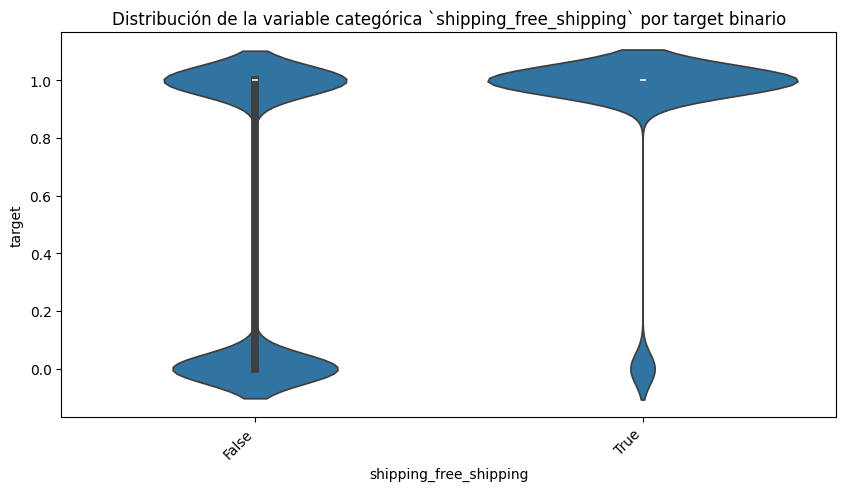

In [45]:
_ = contingency_table_analysis(X_train_df, "shipping_free_shipping", plot_it=True, figsize=(10,5))

#### shipping_mode

Chi2: 905.64
p-value: 0.0000
La variable categórica `shipping_mode` separa bien las clases del target.


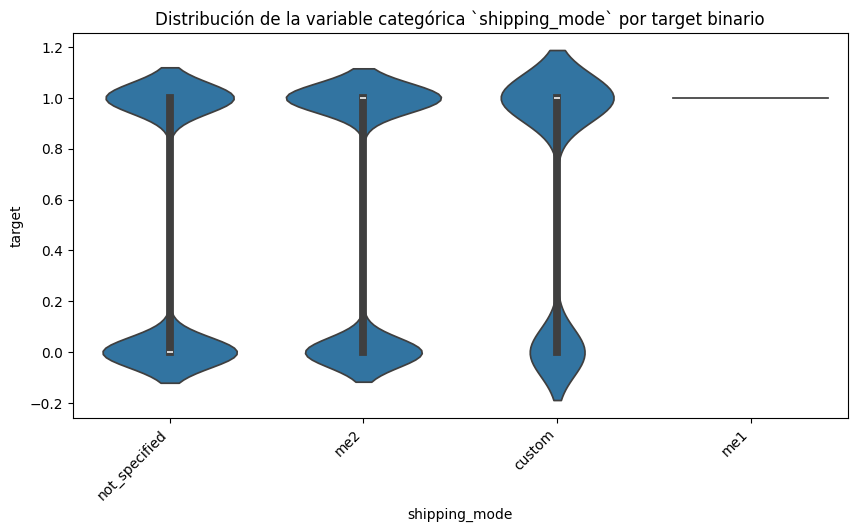

In [46]:
_ = contingency_table_analysis(X_train_df, "shipping_mode", plot_it=True, figsize=(10,5))